# Prediction of Polycystic Ovarian Syndrome (PCOS) using Machine Learning Techniques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
PCOS_inf = pd.read_csv("/Users/jaini/Downloads/ads project/PCOS_infertility.csv")
PCOS_woinf = pd.read_excel("/Users/jaini/Downloads/ads project/PCOS_data_without_infertility.xlsx", sheet_name="Full_new")

In [3]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
PCOS_data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
PCOS_data =PCOS_data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
PCOS_data.head() 

/var/folders/ty/vm1k920j761dmpr5nc3ckkpr0000gn/T/ipykernel_934/102098820.py:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  PCOS_data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [4]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So let's just convert it into a numeric value.

PCOS_data["AMH(ng/mL)"] = pd.to_numeric(PCOS_data["AMH(ng/mL)"], errors='coerce')
PCOS_data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(PCOS_data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

PCOS_data['Marraige Status (Yrs)'].fillna(PCOS_data['Marraige Status (Yrs)'].median(),inplace=True)
PCOS_data['II    beta-HCG(mIU/mL)'].fillna(PCOS_data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
PCOS_data['AMH(ng/mL)'].fillna(PCOS_data['AMH(ng/mL)'].median(),inplace=True)
PCOS_data['Fast food (Y/N)'].fillna(PCOS_data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

PCOS_data.columns = [col.strip() for col in PCOS_data.columns]

In [5]:
PCOS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3   Age (yrs)               541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [6]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

PCOS_data["AMH(ng/mL)"] = pd.to_numeric(PCOS_data["AMH(ng/mL)"], errors='coerce')
PCOS_data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(PCOS_data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

PCOS_data['Marraige Status (Yrs)'].fillna(PCOS_data['Marraige Status (Yrs)'].median(),inplace=True)
PCOS_data['II    beta-HCG(mIU/mL)'].fillna(PCOS_data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
PCOS_data['AMH(ng/mL)'].fillna(PCOS_data['AMH(ng/mL)'].median(),inplace=True)
PCOS_data['Fast food (Y/N)'].fillna(PCOS_data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

PCOS_data.columns = [col.strip() for col in PCOS_data.columns]

In [7]:
PCOS_data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


# Exploratory Data Analysis

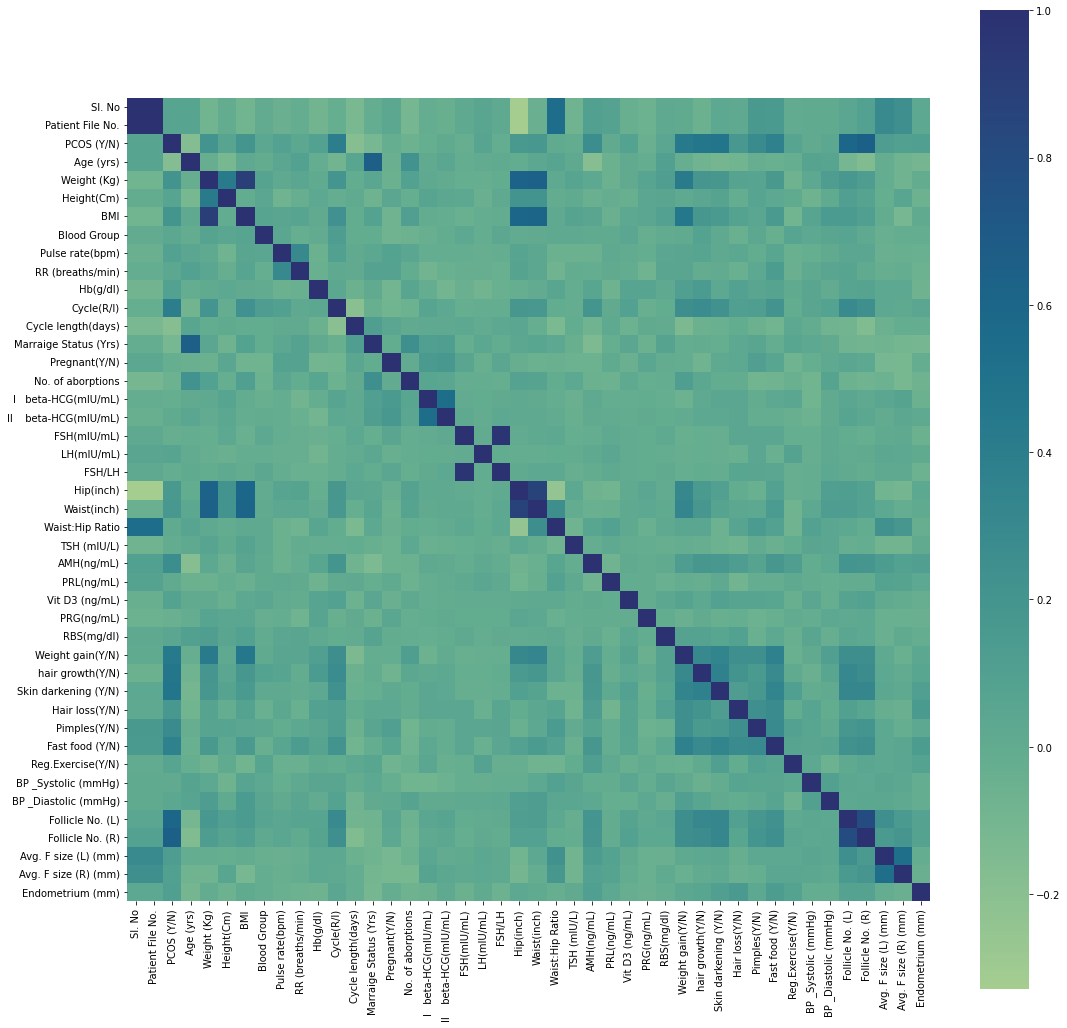

In [8]:
#Examining a correlation matrix of all the features 

corrmat = PCOS_data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="crest", square=True);

In [9]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

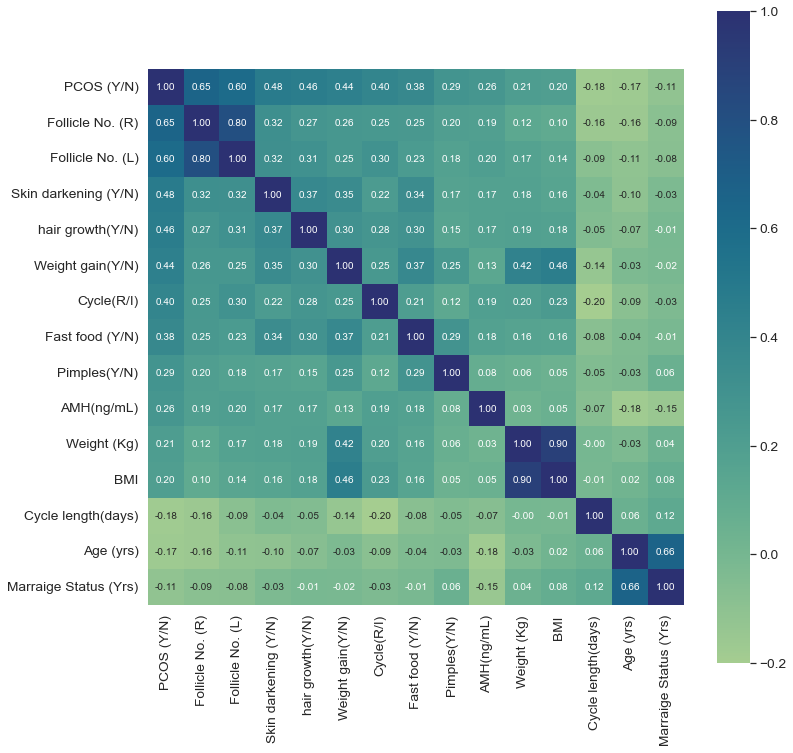

In [10]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(PCOS_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="crest", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

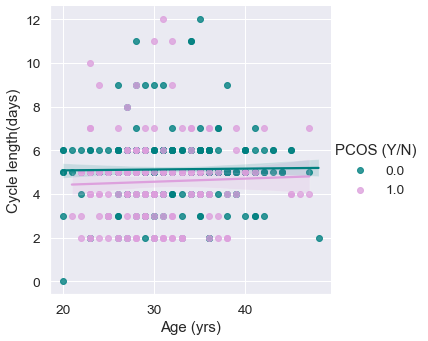

In [11]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=PCOS_data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

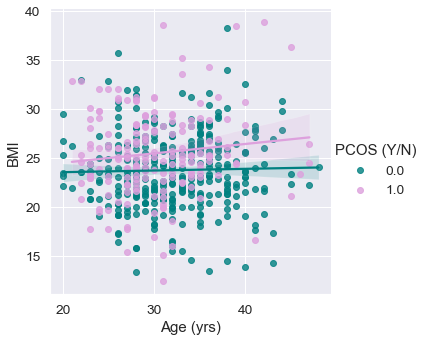

In [12]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =PCOS_data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

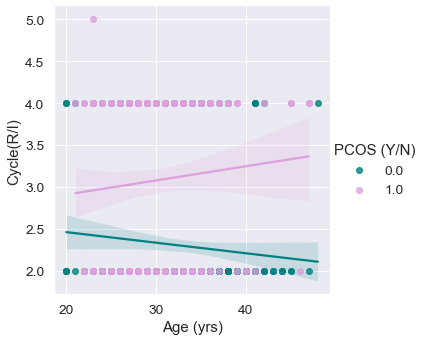

In [13]:
# cycle IR wrt age 
sns.lmplot(data =PCOS_data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

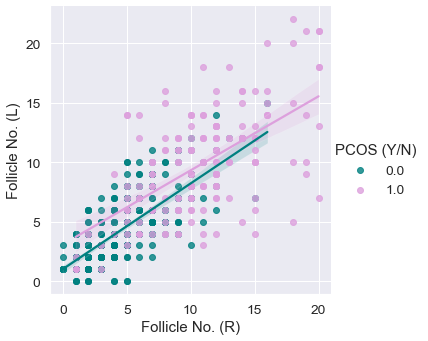

In [14]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =PCOS_data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


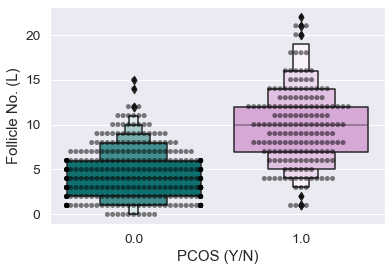

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


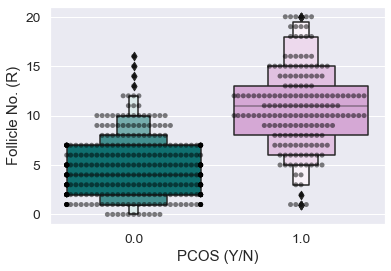

In [15]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=PCOS_data["PCOS (Y/N)"], y=PCOS_data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=PCOS_data["PCOS (Y/N)"], y=PCOS_data[i], palette=color)
    plt.show()

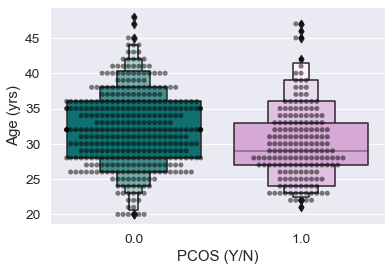

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


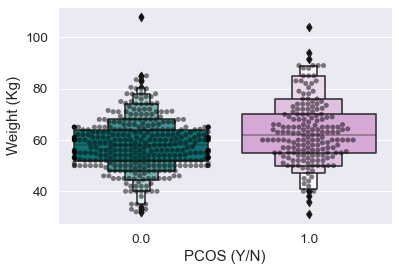

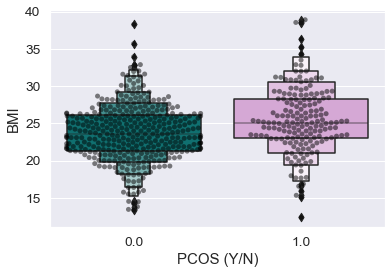

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


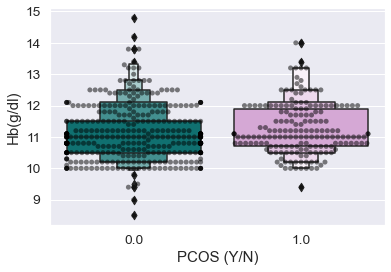

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


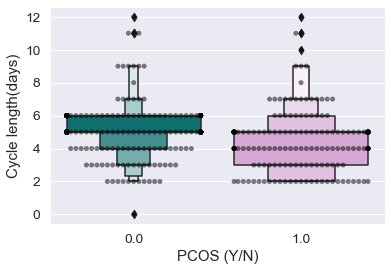

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


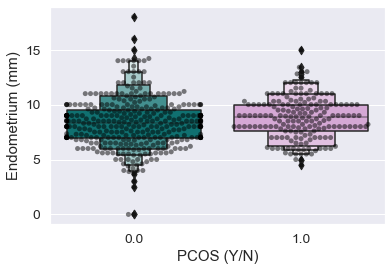

In [16]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=PCOS_data["PCOS (Y/N)"], y=PCOS_data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=PCOS_data["PCOS (Y/N)"], y=PCOS_data[i], palette=color)
    plt.show()

In [17]:
PCOS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3   Age (yrs)               541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

# Model Building 

In [18]:
x=PCOS_data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=PCOS_data["PCOS (Y/N)"]

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
mod1=RandomForestClassifier(random_state=0)
mod1.fit(x_train,y_train)
#fitting the model

RandomForestClassifier(random_state=0)

In [22]:
y_pred=mod1.predict(x_test)

In [23]:
accuracy_score(y_pred,y_test)

0.8957055214723927

In [24]:
classi_report = classification_report(y_test,y_pred)
print(classi_report)
#classification report

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       104
         1.0       0.96      0.75      0.84        59

    accuracy                           0.90       163
   macro avg       0.91      0.86      0.88       163
weighted avg       0.90      0.90      0.89       163



<AxesSubplot:>

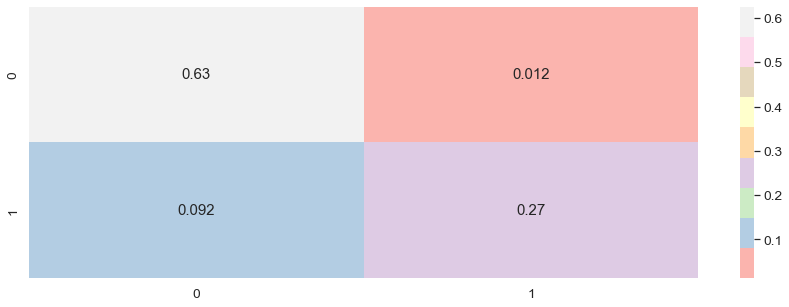

In [25]:
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [26]:
from sklearn.linear_model import LogisticRegression

lm=LogisticRegression()
lm.fit(x_train, y_train)
#fitting the model

/Users/jaini/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=lm.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score= accuracy_score(y_test, y_pred)

In [30]:
accuracy_score

0.8466257668711656

In [30]:
classi_report = classification_report(y_test,y_pred)
print(classi_report)

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       111
         1.0       0.79      0.71      0.75        52

    accuracy                           0.85       163
   macro avg       0.83      0.81      0.82       163
weighted avg       0.84      0.85      0.84       163



<AxesSubplot:>

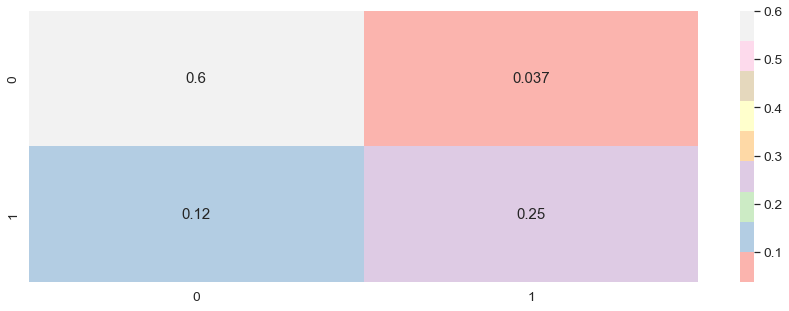

In [31]:
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

# Hypothesis Testing

### i. Chi-Square test

In [42]:
from scipy.stats import chi2_contingency

# create a contingency table of two categorical variables
contingency_table = pd.crosstab(PCOS_data["PCOS (Y/N)"], PCOS_data["hair growth(Y/N)"])

# perform chi-square test of independence
chi2_statistic, pvalue, dof, expected_freq = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected_freq)

Chi-square statistic: 114.59898851794028
p-value: 9.633522761918661e-27
Degrees of freedom: 1
Expected frequencies:
[[264.42144177  99.57855823]
 [128.57855823  48.42144177]]


### ii. T-test

In [29]:
import scipy.stats as stats

# Select the independent and dependent variables
independent =PCOS_data['Follicle No. (L)']
dependent = PCOS_data['PCOS (Y/N)']

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(independent, dependent)

# Print the results
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: 34.04814034991655
P-Value: 1.5605351809577597e-136


### iii. ANOVA

In [30]:
from scipy import stats

# Group the data by PCOS status and get the follicle numbers as a sequence of arrays
pcos_affectedby = PCOS_data.groupby('PCOS (Y/N)')['Follicle No. (R)'].apply(list)

# Perform one-way ANOVA
f_statistic, p = stats.f_oneway(*pcos_affectedby)

# Round the results to 5 decimal places
f_statistic, p = round(f_statistic, 5), round(p, 5)

# Check the p-value and print the appropriate message
if p <= 0.05:
    print(f"Since p = {p} < 0.05, reject H0. There is a significant difference in follicle number between individuals with PCOS and those without PCOS (F={f_statistic}, p={p}).")
else:
    print(f"Since p = {p} > 0.05, fail to reject H0. There is no significant difference in follicle number between individuals with PCOS and those without PCOS (F={f_statistic}, p={p}).")

Since p = 0.0 < 0.05, reject H0. There is a significant difference in follicle number between individuals with PCOS and those without PCOS (F=390.83593, p=0.0).


In [31]:
import numpy as np
from scipy import stats

# Group the data by PCOS status and get the follicle numbers as a sequence of arrays
pcos_affectedbyf = PCOS_data.groupby('PCOS (Y/N)')['Follicle No. (L)'].apply(list)

# Perform one-way ANOVA
f_statistic, p = stats.f_oneway(*pcos_affectedbyf)

# Round the results to 5 decimal places
f_statistic, p = round(f_statistic, 5), round(p, 5)

# Check the p-value and print the appropriate message
if p <= 0.05:
    print(f"Since p = {p} < 0.05, reject H0. There is a significant difference in left follicle number between individuals with PCOS and those without PCOS (F={f_statistic}, p={p}).")
else:
    print(f"Since p = {p} > 0.05, fail to reject H0. There is no significant difference in left follicle number between individuals with PCOS and those without PCOS (F={f_statistic}, p={p}).")

Since p = 0.0 < 0.05, reject H0. There is a significant difference in left follicle number between individuals with PCOS and those without PCOS (F=308.5197, p=0.0).
